<a href="https://colab.research.google.com/github/JuanGallo132/sprint7-final-project-telecom-analysis/blob/main/S7_Version_Estudiante_Project_ConnectaTel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel.

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


---
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [ ]:
# importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [ ]:
# mostrar las primeras 5 filas de plans
plans.head()

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [ ]:
# mostrar las primeras 5 filas de users
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [ ]:
# mostrar las primeras 5 filas de usage
usage.head()

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [ ]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [ ]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [ ]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [ ]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [ ]:
# cantidad de nulos para users
print('Cantidad de nulos para dataframe users')
print(users.isna().sum())
print()
print('Proporción de nulos para dataframe users')
print(users.isna().mean())

Cantidad de nulos para dataframe users
user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64

Proporción de nulos para dataframe users
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [ ]:
# cantidad de nulos para usage
print('Cantidad de nulos para dataframe usage')
print(usage.isna().sum())
print()
print('Proporción de nulos para dataframe usage')
print(usage.isna().mean())

Cantidad de nulos para dataframe usage
id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64

Proporción de nulos para dataframe usage
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos.

 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?
  * Dataframe Users
    * city           11.725%
    * churn_date     88.350%
  * Dataframe Usage
    * Date           0.125%
    * Duration       55.190%
    * Lenght         44.740%
- Indica qué harías: ¿imputar, eliminar, ignorar?
  * Ignoraría columna churn_date, dataframe users
  * Investigo o imputo si es posible columna city, dataframe users
  * Imputo a 0 las columnas duration y lenght, dataframe usage
  * Elimino filas columna date, dataframe usage

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [ ]:
# explorar columnas numéricas de users
users.describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` cuenta con 4,000 registros.
- La columna `age` cuenta con 4,000 registros, media de 33.73 años, desviación estándar de 123.23, datos erróneos que apuntan a -999 años, cuartil 1 de 32, mediana de 47, cuartil 3 de 63 y un máximo de 79.

In [ ]:
# explorar columnas numéricas de usage
usage.describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- Las columnas `id` y `user_id` cuentan 40,000 registros, user_id es una llave principal de unión con dataframe users
- La columna `duration` tiene 17,924 registros, promedio de 5.20, desviación estándar de 6.84, mínimo de 0, cuartil 1 de 1.43, mediana de 3.5, cuartil 3 de 6.99, máximo de 120 indicando valores atípicos outliers.
- La columna `lenght` tiene 22,104 registros, promedio de 52.12, desviación estándar de 56.61, mínimo de 0, cuartil 1 de 37, mediana de 50, cuartil 3 de 64, máximo de 1490 indicando valores atípicos outliers.

In [ ]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
users[columnas_user].describe()

,city,plan
count,3531,4000
unique,7,2
top,Bogotá,Basico
freq,808,2595


- La columna `city` tiene 3,531 registros, 7 valores únicos, dato más frecuente 'Bogotá' con 808 registros.
- La columna `plan` tiene 4,000 registros, 2 valores únicos, dato más frecuente 'Basico' con 2,595 registros.

In [ ]:
# explorar columna categórica de usage
usage['type'].describe() # completa el código

count     40000
unique        2
top        text
freq      22092
Name: type, dtype: object

- La columna `type` tiene 40,000 registros, 2 valores únicos, dato más frecuente 'text' con 22,092 registros.


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso.

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?
  * Se encuentran valores sentinels en la columna 'age', específicamente el sentinel '-999'.
- ¿Qué acción tomarías?
  * Imputación del sentinel a un valor nulo.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [ ]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors = 'coerce')
# Verificación del cambio en el tipo de columna 'reg_date' de users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     4000 non-null   int64         
 1   first_name  4000 non-null   object        
 2   last_name   4000 non-null   object        
 3   age         4000 non-null   int64         
 4   city        3531 non-null   object        
 5   reg_date    4000 non-null   datetime64[ns]
 6   plan        4000 non-null   object        
 7   churn_date  466 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 250.1+ KB


In [ ]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors = 'coerce')
# Verificación del cambio en el tipo de columna 'date' de usage
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        40000 non-null  int64         
 1   user_id   40000 non-null  int64         
 2   type      40000 non-null  object        
 3   date      39950 non-null  datetime64[ns]
 4   duration  17924 non-null  float64       
 5   length    22104 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 1.8+ MB


In [ ]:
# Revisar los años presentes en `reg_date` de users
years_uniques_users = users['reg_date'].dt.year.unique()
print(years_uniques_users)

[2022 2026 2023 2024]


En `reg_date` encontramos 4 años: 2022, 2023, 2024 y 2026

In [ ]:
# Revisar los años presentes en `date` de usage
years_uniques_usage = usage['date'].dt.year.unique()
print(years_uniques_usage)

[2024.   nan]


En `date` encontramos 2 valores: 2024 y nulos.
Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
  * En el dataframe Users no transcurre el año 2025.
  * En el dataframe Usage encontramos valores nulos.
- ¿Qué harías con ellas?
  * En el caso del dataframe users ignoro estos posibles faltantes, ya que no se cuenta con ellas, y el análisis se hará del año 2024.
  * En el caso del dataframe usage ignoro los valores nulos para el análisis, centrándonos en el año 2024.

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [ ]:
# Reemplazar -999 por la mediana de age
age_mediana = users['age'].median()
sentinels_age_users = [-999]
users['age'] = users['age'].replace(sentinels_age_users, age_mediana)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.122250
std        17.690408
min        18.000000
25%        33.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [ ]:
# Reemplazar ? por NA en city
sentinels_city_users = ['?', 'nan']
users['city'] = users['city'].replace(sentinels_city_users, pd.NA)

# Verificar cambios
users['city'].describe()

count       3435
unique         6
top       Bogotá
freq         808
Name: city, dtype: object

In [ ]:
# Marcar fechas futuras como NA para reg_date
users.loc[users['reg_date'].dt.year != 2024, 'reg_date'] = pd.NaT

# Verificar cambios
year_2024_unique_users = users['reg_date'].dt.year.unique()
print(year_2024_unique_users)

[  nan 2024.]


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [ ]:
# Verificación MAR en usage (Missing At Random) para duration
usage['duration'].isna().groupby(usage['type']).mean().sort_values(ascending = False)

type
text    0.999276
call    0.000000
Name: duration, dtype: float64

In [ ]:
# Verificación MAR en usage (Missing At Random) para length
usage['length'].isna().groupby(usage['type']).mean().sort_values(ascending = False)

type
call    0.99933
text    0.00000
Name: length, dtype: float64

Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`
* Casi el 100% de los nulos en duration ocurren cuando el tipo es text, y casi el 100% de los nulos en length ocurren cuando el tipo es call. Se confirma que son valores MAR (Missing At Random), ya que la probabilidad de que el dato falte depende totalmente de la variable observable type
    * Duration: Se mantiene como nulo porque un mensaje de texto no posee una duración física medible en segundos.
    * Length: Se mantiene como nulo porque una llamada de voz no genera una cantidad de caracteres de texto.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico.

**Instrucciones:**:
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [ ]:
# 1.  Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas

# 2. Crear tabla agregada
usage_agg = usage.groupby('user_id').agg(
    cant_mensajes=('is_text', 'sum'),
    cant_llamadas=('is_call', 'sum'),
    cant_minutos_llamada=('duration', 'sum')
).reset_index()

# 3. Verificación
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Renombrar columnas

usage_agg.rename(columns={
    'cant_mensajes': 'cantidad_mensajes',
    'cant_llamadas': 'cantidad_llamadas',
    'cant_minutos_llamada': 'cantidad_minutos_por_llamada'
}, inplace=True)

# observar resultado
usage_agg.head(3)

,user_id,cantidad_mensajes,cantidad_llamadas,cantidad_minutos_por_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Combinar la tabla agregada con el dataset de usuarios
# Usamos 'left' para no perder usuarios que quizás no tuvieron actividad en 'usage'
user_profile = users.merge(usage_agg, on='user_id', how='left')

# 4. Limpieza post-fusión
# Si un usuario no aparece en usage, sus métricas serán NaN; las llenamos con 0
cols_fill = ['cantidad_mensajes', 'cantidad_llamadas', 'cantidad_minutos_por_llamada']
user_profile[cols_fill] = user_profile[cols_fill].fillna(0)

# Verificación
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cantidad_mensajes,cantidad_llamadas,cantidad_minutos_por_llamada
0,10000,Carlos,Garcia,38.0,Medellín,NaT,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,NaT,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,NaT,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,NaT,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,NaT,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [ ]:
# Resumen estadístico de las columnas numéricas
col_num = ['age', 'cantidad_mensajes', 'cantidad_llamadas', 'cantidad_minutos_por_llamada']
user_profile[col_num].describe()

,age,cantidad_mensajes,cantidad_llamadas,cantidad_minutos_por_llamada
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,48.122250,5.523000,4.477000,23.311225
std,17.690408,2.359738,2.145139,18.169564
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.107500
50%,47.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.412500
max,79.000000,17.000000,15.000000,155.690000


In [ ]:
# Distribución porcentual del tipo de plan
distribucion_plan = user_profile['plan'].value_counts(normalize=True) * 100

# Mostrar el resultado con un formato amigable
print("Distribución porcentual por plan:")
print(distribucion_plan.map('{:.2f}%'.format))

Distribución porcentual por plan:
Basico     64.88%
Premium    35.12%
Name: plan, dtype: object


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada`

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda)

**Hint**  
Para cada histograma,
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

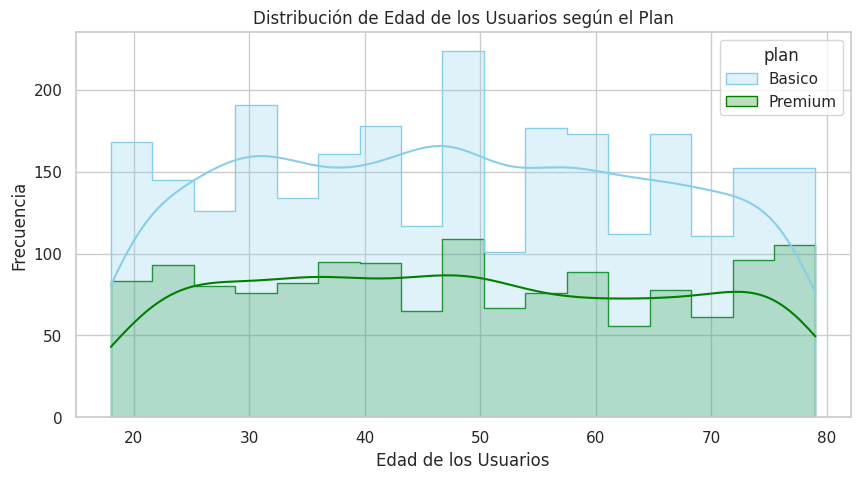

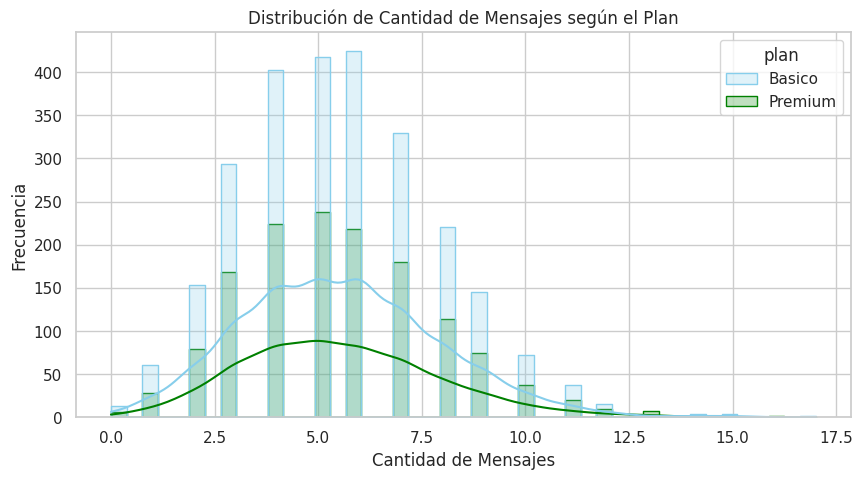

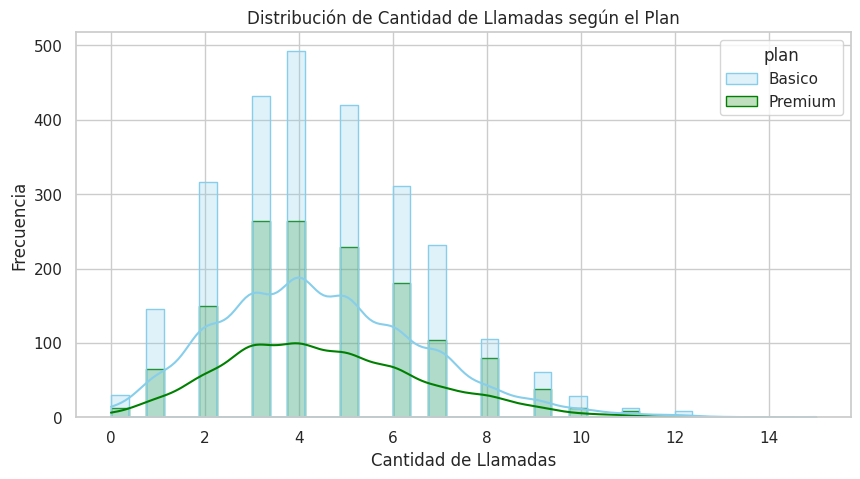

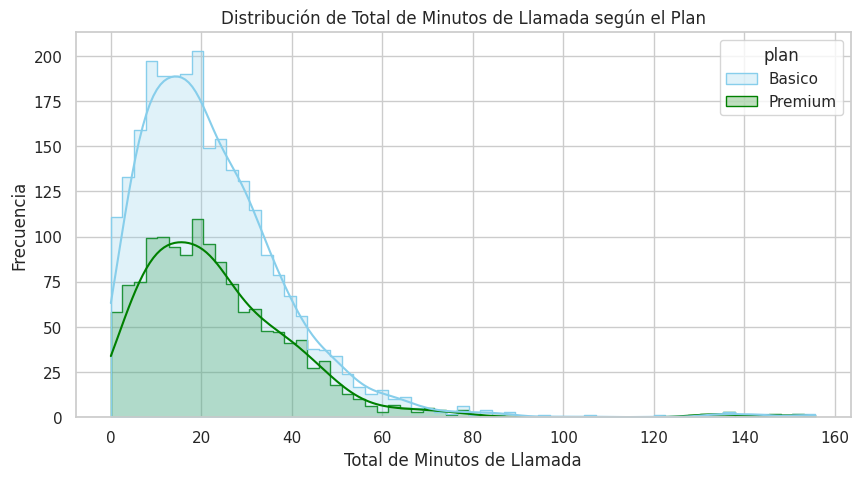

In [ ]:
# Configuración de estilo
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# Lista de variables a graficar según tus instrucciones

variables = {
    'age': 'Edad de los Usuarios',
    'cantidad_mensajes': 'Cantidad de Mensajes',
    'cantidad_llamadas': 'Cantidad de Llamadas',
    'cantidad_minutos_por_llamada': 'Total de Minutos de Llamada'
}


for col, titulo in variables.items():
    plt.figure()
    sns.histplot(
        data = user_profile,
        x = col,
        hue = 'plan',
        palette = ['skyblue', 'green'],
        kde = True,
        element = "step"
    )
    plt.title(f'Distribución de {titulo} según el Plan')
    plt.xlabel(titulo)
    plt.ylabel('Frecuencia')
    plt.show()

💡 Insights Edad de los Usuarios:
* No existe un patrón o diferencia significativa en la edad de los usuarios entre el plan Básico y el plan Premium; ambos planes muestran una distribución de usuarios que abarca de forma similar desde los 18 hasta los 80 años.
* Frecuencia: El plan Básico cuenta con una base de usuarios considerablemente mayor en todos los rangos de edad en comparación con el plan Premium.
* Forma de la distribución: La distribución es aproximadamente simétrica y uniforme, lo que indica que el servicio atrae a usuarios de todas las edades por igual sin concentrarse en un nicho generacional específico.

💡 Insights Cantidad de Mensajes:
* Distribución: Presenta una distribución sesgada a la derecha (asimetría positiva). La mayoría de los usuarios envían entre 2 y 8 mensajes, con muy pocos usuarios superando los 12 mensajes.
* Insight por Plan: Los usuarios del plan Básico tienen una mayor concentración en el envío de 4 a 6 mensajes. Por su parte, los usuarios Premium muestran un comportamiento similar pero con menor frecuencia total, sin que el plan Premium incentive un volumen de mensajería drásticamente superior.

💡 Insights Cantidad de Llamadas:
* Distribución: Presenta una distribución sesgada a la derecha (asimetría positiva). La mayoría de los usuarios realizan un número bajo de llamadas (entre 2 y 6), mientras que la frecuencia disminuye drásticamente a medida que aumenta la cantidad de llamadas.
* Punto de Concentración Máxima (Moda): Existe un pico muy marcado en las 4 llamadas por usuario para ambos planes. Es el comportamiento más común en tu base de datos.
* Rango de Actividad: La gran mayoría de los usuarios se mantiene en un rango de 0 a 8 llamadas. A partir de las 10 llamadas, la frecuencia es mínima, lo que sugiere que los "grandes habladores" son una minoría extrema.

💡 Insights Total de Minutos de Llamada:
* Distribución: La variable presenta una distribución sesgada a la derecha (asimetría positiva). La mayoría de los usuarios se concentran en consumos bajos a moderados, con una "cola" que se extiende hacia valores altos, indicando la presencia de usuarios con un uso intensivo del servicio.
* Rango de Consumo Típico: El grueso de la base de usuarios, independientemente de su plan, acumula entre 5 y 30 minutos totales de llamada.
* Punto de Máxima Frecuencia (Moda): Se observa que el pico de usuarios del plan Básico se agrupa fuertemente alrededor de los 15 a 20 minutos. Esto sugiere que el usuario promedio utiliza el servicio para comunicaciones breves y funcionales.
* Comparativa entre Planes:
    * Aunque el plan Básico (celeste) tiene un volumen de usuarios muy superior, la forma de su curva de densidad (KDE) es casi idéntica a la del plan Premium (verde) en el rango de 0 a 60 minutos. Esto indica que, para la mayoría de la población, el tipo de plan no altera el hábito de consumo de minutos; los usuarios no hablan más simplemente por tener un plan superior.
* Presencia de Outliers (Valores Atípicos):
    * Se identifican usuarios "extremos" que superan los 120 e incluso 140 minutos totales.
    * Un hallazgo interesante es que estos usuarios con consumos muy altos aparecen en ambos planes. Si un usuario del plan Básico consume constantemente más de 100 minutos, representaría una oportunidad de upselling (migración a un plan superior) para la empresa.
* Relación con la Cantidad de Llamadas: Al contrastar este gráfico con el de "Cantidad de Llamadas", se infiere que el volumen total de minutos depende más de la duración individual de cada llamada que del número de veces que el usuario marca un número, dado que la cantidad de llamadas se estanca en un promedio de 4.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age`
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

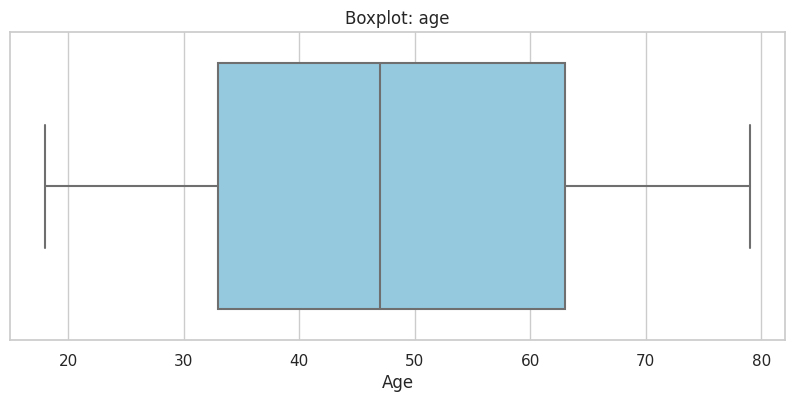

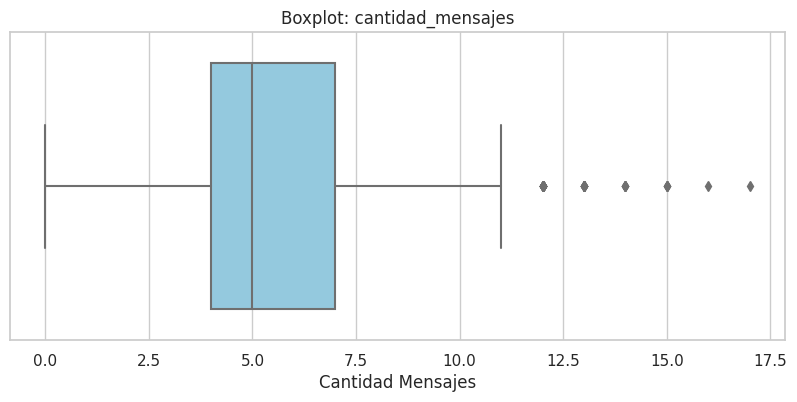

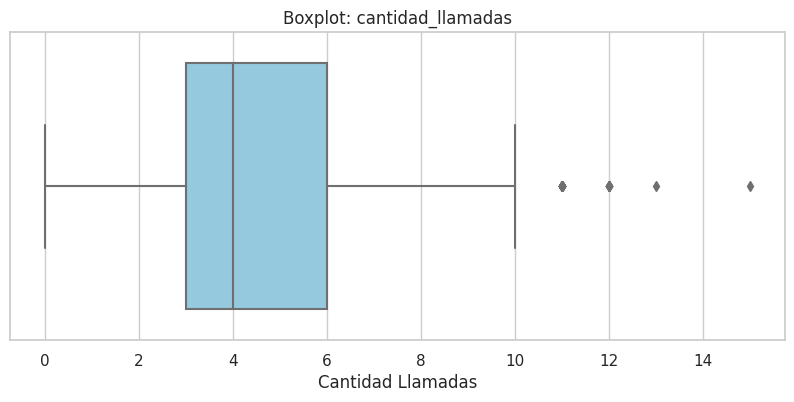

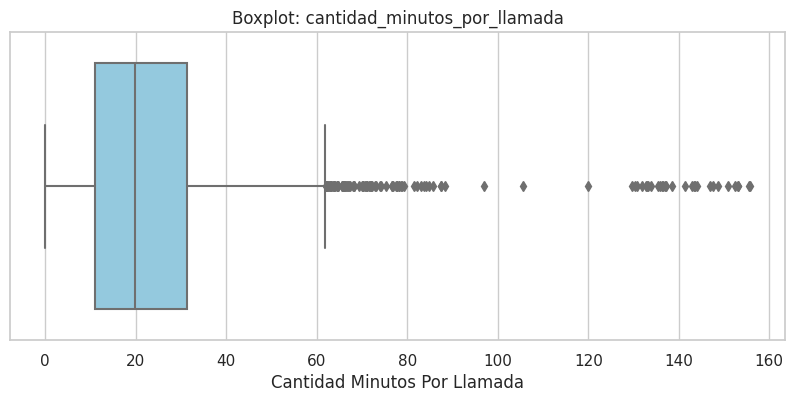

In [ ]:
# Visualizando usando BoxPlot
columnas_numericas = {
    'age': 'Edad de los Usuarios',
    'cantidad_mensajes': 'Cantidad de Mensajes',
    'cantidad_llamadas': 'Cantidad de Llamadas',
    'cantidad_minutos_por_llamada': 'Total de Minutos de Llamada'
}

# Bucle para generar los 4 boxplots automáticamente
for col in columnas_numericas:
    plt.figure(figsize = (10, 4))
    sns.boxplot(data = user_profile, x = col, palette = ['skyblue']) # Estilo consistente
    plt.title(f'Boxplot: {col}') # Hint aplicado
    plt.xlabel(col.replace('_', ' ').title())
    plt.show()

💡Insights:
- Edad: No presenta outliers
- Cantidad de mensajes: Si presenta outliers
- Cantidad de llamadas: Si presenta outliers
- Cantidad de minutos por llamada: Si presenta outliers

In [ ]:
# Calcular límites con el método IQR
columnas_limites = ['cantidad_mensajes', 'cantidad_llamadas', 'cantidad_minutos_por_llamada']

for col in columnas_limites:
    # Mostrar nombre de la columna analizada en cada etapa del bucle
    print('Nombre de columna analizada: ', col)

    # Calcular cuartil 1, cuartil 3, e IQR
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calcular límite inferior y superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Mostrar resultados
    print('Primer cuartil: ', Q1)
    print('Tercer cuartil: ', Q3)
    print('IQR: ', IQR)
    print(f" - Límite inferior para outliers: {limite_inferior:.2f}")
    print(f" - Límite superior para outliers: {limite_superior:.2f}")

    # Conteo de cuántos registros superan el límite
    total_outliers = (user_profile[col] > limite_superior).sum()
    print(f" - Cantidad de valores extremos detectados: {total_outliers}")
    print("-" * 30)
    print()

Nombre de columna analizada:  cantidad_mensajes
Primer cuartil:  4.0
Tercer cuartil:  7.0
IQR:  3.0
 - Límite inferior para outliers: -0.50
 - Límite superior para outliers: 11.50
 - Cantidad de valores extremos detectados: 46
------------------------------

Nombre de columna analizada:  cantidad_llamadas
Primer cuartil:  3.0
Tercer cuartil:  6.0
IQR:  3.0
 - Límite inferior para outliers: -1.50
 - Límite superior para outliers: 10.50
 - Cantidad de valores extremos detectados: 30
------------------------------

Nombre de columna analizada:  cantidad_minutos_por_llamada
Primer cuartil:  11.1075
Tercer cuartil:  31.4125
IQR:  20.305
 - Límite inferior para outliers: -19.35
 - Límite superior para outliers: 61.87
 - Cantidad de valores extremos detectados: 109
------------------------------



In [ ]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cantidad_mensajes,cantidad_llamadas,cantidad_minutos_por_llamada
count,4000.000000,4000.000000,4000.000000
mean,5.523000,4.477000,23.311225
std,2.359738,2.145139,18.169564
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.107500
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.412500
max,17.000000,15.000000,155.690000


💡 Insights:
* Identificación: Las variables de uso (cantidad_mensajes, cantidad_llamadas, cantidad_minutos_por_llamada) presentan sesgo a la derecha y outliers claros.

* Generalmente, en telecomunicaciones, estos outliers representan a los "Heavy Users" (usuarios de alto consumo).

* Acción: Se recomienda mantenerlos en el análisis. Eliminarlos borraría a los clientes más rentables o activos, lo cual sesgaría el cálculo de ingresos y el comportamiento real del mercado.

* Edad (age): Si el boxplot muestra una distribución uniforme y simétrica sin puntos aislados, se confirma que no existen outliers en la edad de la base de usuarios.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [ ]:
# Crear columna grupo_uso
condiciones_grupo_uso = [
    (user_profile['cantidad_llamadas'] < 5) & (user_profile['cantidad_mensajes'] < 5),
    (user_profile['cantidad_llamadas'] < 10) & (user_profile['cantidad_mensajes'] < 10)
]

opciones = ['Bajo uso', 'Uso medio']

user_profile['grupo_uso'] = np.select(condiciones_grupo_uso, opciones, default='Alto uso')

# Verificación de la segmentación
print(user_profile['grupo_uso'].value_counts())

Uso medio    2943
Bajo uso      779
Alto uso      278
Name: grupo_uso, dtype: int64


In [ ]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cantidad_mensajes,cantidad_llamadas,cantidad_minutos_por_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,NaT,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,NaT,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,NaT,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,NaT,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,NaT,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [ ]:
# Crear columna grupo_edad
condiciones_edad = [
    (user_profile['age'] < 30),
    (user_profile['age'] < 60)
]

# Definir los nombres de las categorías correspondientes
categorias_edad = ['Joven', 'Adulto']

# Crear la columna 'grupo_edad', asignando 'Adulto Mayor' por defecto
user_profile['grupo_edad'] = np.select(condiciones_edad, categorias_edad, default='Adulto Mayor')

# Verificación de los resultados
print(user_profile[['user_id', 'age', 'grupo_edad', 'grupo_uso']].head())

   user_id   age    grupo_edad  grupo_uso
0    10000  38.0        Adulto  Uso medio
1    10001  53.0        Adulto   Alto uso
2    10002  57.0        Adulto  Uso medio
3    10003  69.0  Adulto Mayor   Alto uso
4    10004  63.0  Adulto Mayor   Bajo uso


In [ ]:
# verificar cambios generales
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cantidad_mensajes,cantidad_llamadas,cantidad_minutos_por_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,NaT,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,<NA>,NaT,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,NaT,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,NaT,Premium,NaN,11.0,3.0,8.99,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,NaT,Basico,NaN,4.0,3.0,8.01,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

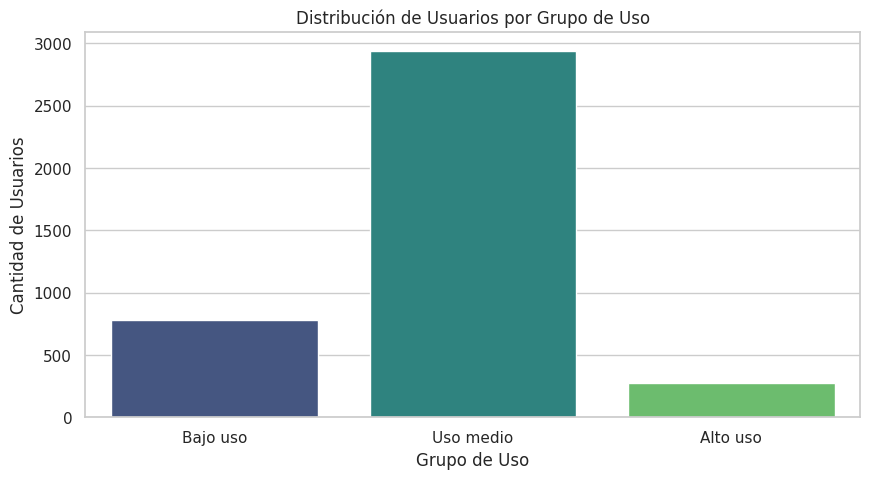

In [ ]:
# Visualización de los segmentos por uso
plt.figure(figsize = (10, 5))
sns.countplot(data = user_profile, x = 'grupo_uso', order = ['Bajo uso', 'Uso medio', 'Alto uso'], palette = 'viridis')
plt.title('Distribución de Usuarios por Grupo de Uso')
plt.xlabel('Grupo de Uso')
plt.ylabel('Cantidad de Usuarios')
plt.show()

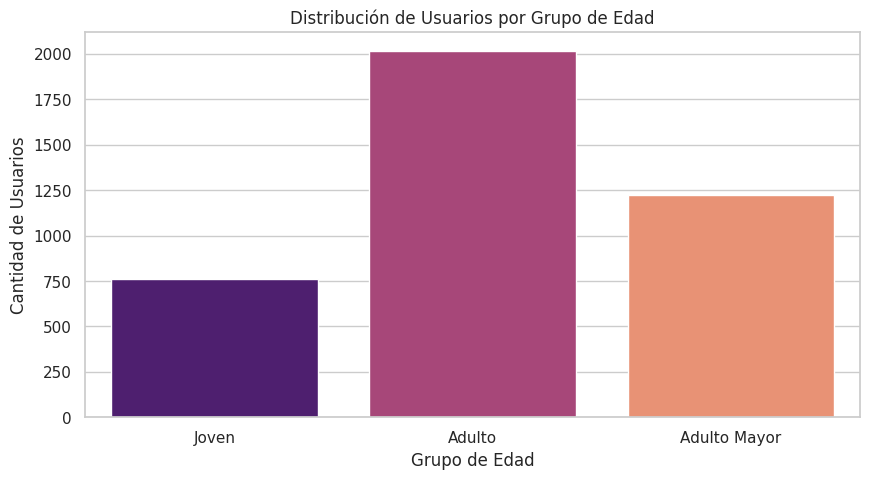

In [ ]:
# Visualización de los segmentos por edad
plt.figure(figsize = (10, 5))
sns.countplot(data = user_profile, x = 'grupo_edad', order = ['Joven', 'Adulto', 'Adulto Mayor'], palette = 'magma')
plt.title('Distribución de Usuarios por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Usuarios')
plt.show()

### 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:**
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
1. Visualización de Distribuciones (Paso 5)
El objetivo fue entender el comportamiento de las variables clave y las diferencias por plan.

* Edad de los Usuarios: Presenta una distribución uniforme y simétrica entre los 18 y 80 años aproximadamente. No se observa un patrón demográfico que defina la elección del plan; usuarios de todas las edades están presentes tanto en el plan Básico como en el Premium.

* Cantidad de Mensajes: Muestra una distribución sesgada a la derecha (asimetría positiva). La mayoría de los usuarios envía entre 2.5 y 7.5 mensajes, con un pico claro en los 5 mensajes.

* Cantidad de Llamadas: También presenta un sesgo a la derecha. El grueso de la actividad se concentra entre las 2 y 6 llamadas, con una moda muy marcada en las 4 llamadas por usuario.

* Total de Minutos de Llamada: Exhibe una distribución sesgada a la derecha. La mayoría de los usuarios consume entre 5 y 30 minutos totales.

2. Identificación de Outliers (Paso 6)
Utilizando boxplots y el método IQR, se analizaron los valores extremos.

* Resultados: Se detectaron outliers significativos en las variables de uso (cant_mensajes, cant_llamadas, total_minutos_llamada), especialmente en consumos que superan los 120 minutos.

* Decisión: Se recomienda mantener los outliers. Estos representan a los "Heavy Users", clientes reales de alto consumo cuyo comportamiento es fundamental para el análisis de rentabilidad del negocio.

🔍 **Segmentos por Edad**
* Joven: Menos de 30 años.
* Adulto: Menos de 60 años.
* Adulto Mayor: 60 años o más.
* Insight: El segmento de "Adultos" constituye la mayor parte de la base de clientes, seguido por los Adultos Mayores y, en menor medida, los Jóvenes.

📊 **Segmentos por Nivel de Uso**
* Bajo uso: Menos de 5 llamadas y menos de 5 mensajes.
* Uso medio: Menos de 10 llamadas y menos de 10 mensajes.
* Alto uso: Resto de casos.
* Insight: El grupo de "Uso medio" es el más numeroso, superando ampliamente a los otros dos segmentos.


➡️ Esto sugiere que ...

* Baja correlación entre Plan y Uso: La similitud casi idéntica en las curvas de distribución de mensajes y minutos entre ambos planes sugiere que el plan Premium no está siendo aprovechado por sus beneficios de volumen, o que los usuarios del plan Básico están alcanzando topes de consumo similares sin migrar de categoría.

* Dominio del Segmento Adulto: El hecho de que el grupo "Adulto" sea el más numeroso y que la edad sea uniforme indica que el servicio tiene una madurez de mercado estable, sin depender de modas juveniles o nichos específicos.

* Oportunidad en el "Uso Medio": Al ser el segmento de "Uso medio" el más grande en la categoría grupo_uso, sugiere que existe una gran masa crítica de clientes que podría ser incentivada a consumir más mediante paquetes adicionales o beneficios temporales.

* Heavy Users no aprovechados: La presencia de outliers (usuarios con más de 120 minutos) en el plan Básico sugiere que hay clientes con necesidades de alto consumo que están pagando excedentes o tarifas estándar en lugar de estar en un plan optimizado para ellos.

💡 **Recomendaciones**

* Estrategia de Upselling: Identificar a los usuarios etiquetados como "Alto uso" que actualmente poseen un plan Básico para ofrecerles una migración dirigida al plan Premium, destacando el ahorro potencial basado en sus propios outliers de consumo.

* Fidelización del Segmento Adulto Mayor: Dado que este grupo tiene una representación importante y una distribución de edad uniforme, se podrían diseñar interfaces o servicios de asistencia simplificados, ya que su lealtad suele ser mayor que la del segmento Joven.

* Revisión del Valor Premium: Evaluar si el plan Premium ofrece beneficios adicionales (como roaming o datos) más allá de los minutos y mensajes, ya que, estadísticamente, el comportamiento de consumo de estas dos variables no justifica por sí solo la diferencia de plan para la mayoría de los usuarios.

* Monitoreo de Outliers: No eliminar los valores atípicos de los reportes mensuales de red; por el contrario, crear un tablero de control específico para estos "Heavy Users" para prevenir la saturación de celdas en zonas donde estos usuarios se concentren.

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`

In [ ]:
https://github.com/JuanGallo132/sprint7-final-project-telecom-analysis